In [1]:
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

In [2]:
energy = np.array([1.14807054e+04, 6.87672205e+04, 9.12560377e+04, 7.91099591e+04,
       8.72696981e+04, 1.09882504e+05, 4.95668806e+04, 4.80759773e+04,
       6.15133358e+04, 7.24193672e+04, 5.88472535e+04, 5.26684288e+04,
       7.74229948e+04, 1.07437555e+05, 1.02504547e+05, 2.53671368e+05,
       3.23055820e+05, 1.94039179e+05, 1.00473928e+05, 6.22243448e+04,
       5.31761746e+04, 7.77409305e+04, 5.56570832e+04, 1.13991102e+05,
       1.43877920e+05, 2.31591859e+05, 1.73006023e+05, 1.68553456e+05,
       8.04037535e+04, 3.83297226e+04, 8.93926945e+04, 1.08465216e+05,
       5.80065107e+04, 5.44367887e+04, 1.01237234e+05, 7.69452397e+04,
       6.37060799e+04, 9.93498524e+04, 1.02918355e+05, 6.96762466e+04,
       7.37105117e+04, 2.39949574e+05, 6.13678938e+04, 4.51548909e+04,
       6.97431790e+04, 4.01526660e+04, 5.00241412e+04, 4.52133834e+04,
       9.99048763e+04, 7.83422464e+04, 7.63785281e+04, 7.51057080e+04,
       1.12870898e+05, 2.79298909e+05, 2.89864858e+06, 3.79936378e+06,
       2.87744621e+06, 1.04268056e+06, 7.58475798e+05, 7.47713310e+05,
       6.14561866e+05, 3.77073265e+05, 4.52652000e+05, 4.17081747e+05,
       2.15973108e+05, 1.96891259e+05, 2.07101354e+05, 1.92724664e+05,
       3.11767983e+05, 2.66626344e+05, 2.59964211e+05, 1.29010260e+05,
       4.79982957e+04, 1.15737334e+05, 1.68237129e+05, 2.90421488e+05,
       1.83888065e+05, 2.09043306e+05, 1.17179900e+05, 2.58214162e+05,
       7.16041615e+04, 1.88894602e+06, 5.61099174e+06, 1.05453690e+06,
       2.53973494e+06, 1.34751803e+07, 2.48106966e+08, 8.35584217e+08,
       9.94829725e+08, 2.48203712e+09, 4.39489493e+09, 2.87208296e+09,
       1.92235372e+09, 1.39151634e+09, 1.67087078e+09, 1.77530276e+09,
       1.41378086e+09, 8.62012747e+08, 7.25431094e+08, 5.93941114e+08,
       5.13037980e+08, 2.92642721e+08, 2.86492345e+08, 2.24890447e+08,
       8.04461556e+07, 4.12820818e+07, 1.46172251e+07, 5.80830681e+06,
       3.35974318e+06, 2.04225932e+06, 2.84241342e+06, 1.76227935e+06,
       1.94688397e+06, 1.34009811e+06, 9.80012387e+05, 8.65397278e+05,
       7.69313612e+05, 1.28731593e+06, 9.21774682e+05, 5.90254773e+05,
       5.49178496e+05, 6.28011558e+05, 4.55180700e+05, 2.99407382e+05,
       3.54710785e+05, 4.05382263e+05, 4.94635083e+05, 2.66472240e+05,
       2.85717236e+05, 3.55757771e+05, 3.13946101e+05, 2.24658912e+05,
       2.39983923e+05, 2.98488298e+05, 1.65785936e+05, 1.54166983e+05,
       1.67803747e+05, 1.55894440e+05, 1.81001080e+05, 1.64073154e+05,
       1.88554616e+05, 1.80735122e+05, 1.28769364e+05, 6.13666423e+04,
       8.04540150e+04, 1.01185411e+05, 8.51103355e+04, 1.10448600e+05,
       1.53779612e+05, 1.22077502e+05, 6.22739273e+04, 1.47019800e+05,
       7.27564840e+04, 5.14758344e+04, 4.79385423e+04, 6.54123274e+04,
       9.99011775e+04, 1.22793904e+05, 1.31781310e+05, 1.58533728e+05,
       7.09530246e+04, 7.62444947e+04, 4.09568733e+04, 1.03864518e+05,
       6.94865135e+04, 6.80866853e+04, 8.83352916e+04, 6.00654866e+04,
       8.20020069e+04, 9.21133703e+04, 7.74751298e+04, 6.03563551e+04,
       1.28489297e+05, 7.25379792e+04, 1.32875084e+05, 8.79299173e+04,
       3.84819327e+04, 1.28434904e+05, 8.47221682e+05, 1.54157293e+05,
       1.60644715e+05, 9.43548435e+04, 9.92638588e+05, 9.63945257e+05,
       1.45627537e+05, 6.43801991e+04, 3.83256224e+04, 6.46879051e+04,
       7.26640808e+04, 9.93519754e+04, 9.30745347e+04, 6.32313764e+04,
       1.77330407e+05, 1.22551201e+05, 1.18694122e+05, 1.96044557e+06,
       8.13581301e+05, 5.28695536e+05, 8.54544489e+05, 6.86610823e+06,
       1.61088014e+08, 5.90988184e+08, 9.41691536e+08, 1.01231181e+09,
       1.21999147e+09, 1.25121956e+09, 9.72787227e+08, 7.81591972e+08,
       6.69951518e+08, 5.81761811e+08, 5.61753943e+08, 5.34650734e+08,
       5.19400061e+08, 4.30765886e+08, 3.04683517e+08, 1.92253351e+08,
       1.04871760e+08, 9.84607047e+07, 6.72380172e+07, 3.39493265e+07,
       1.09775570e+07, 1.50856362e+07, 8.38465123e+06, 4.63570954e+06,
       3.07026084e+06, 2.69008953e+06, 1.82271954e+06, 1.61283188e+06,
       1.30504378e+06, 1.04240669e+06, 6.05616711e+05, 3.33601109e+05,
       4.24562362e+05, 1.76665610e+05, 3.69801925e+05, 6.20952384e+05,
       4.50860252e+05, 4.26714506e+05, 3.55518194e+05, 3.31586830e+05,
       2.65787102e+05, 1.13616116e+05, 7.67382639e+04, 1.26989316e+05,
       1.49914243e+05, 2.82214117e+05, 2.30394109e+05, 2.77091089e+05,
       1.71529703e+05, 6.36899619e+04, 9.63303269e+04, 1.66908635e+05,
       1.04951318e+05, 1.24366309e+05, 7.16162401e+04, 7.34195811e+04,
       5.90296436e+04, 1.15743303e+05, 8.74146861e+04, 9.94719859e+04,
       9.81828514e+04, 1.16690173e+05, 1.35651505e+05, 8.95666260e+04,
       6.94019601e+04, 8.30413980e+04, 9.03558872e+04, 9.71097743e+04,
       5.15889301e+04, 1.03872219e+05, 7.19253109e+04, 8.76679769e+04,
       1.14801882e+05, 2.24725327e+05, 9.97353861e+04, 6.93808565e+04,
       6.50312656e+04, 8.43345403e+04, 1.03483827e+05, 8.55775104e+04,
       3.77790111e+04, 6.77511566e+04, 5.78510638e+04, 7.32728353e+04,
       3.08061985e+04, 1.19418246e+05, 1.76648906e+05, 8.49866866e+04,
       5.77990548e+04, 2.35455266e+05, 1.34668605e+05, 1.12307085e+05,
       2.21906809e+05, 1.09064240e+05, 1.19960807e+05, 1.40550658e+05,
       1.19394205e+05, 1.12277619e+05, 1.51607596e+05, 6.88873450e+04,
       8.29792702e+04, 6.20551374e+04, 4.53660941e+04, 1.06693919e+05,
       9.29281853e+04, 7.31292032e+04, 7.86596507e+04, 2.12619583e+05,
       3.81075016e+05, 6.56647843e+05, 1.52709082e+06, 1.05218711e+08,
       2.67656884e+08, 3.07732772e+08, 4.95094737e+08, 7.12574331e+08,
       9.15689745e+08, 9.82378713e+08, 7.28902760e+08, 4.75971424e+08,
       1.91734889e+08, 1.63844817e+08, 1.72579213e+08, 1.39074729e+08,
       9.66271753e+07, 9.95658051e+07, 6.91339449e+07, 5.94531866e+07,
       7.23884314e+07, 5.24169700e+07, 1.54783892e+07, 5.91608548e+06,
       7.29608512e+06, 5.04494014e+06, 4.12118175e+06, 1.84989979e+06,
       1.14804781e+06, 7.56254713e+05, 7.01892705e+05, 5.70490665e+05,
       6.11857947e+05, 4.56239123e+05, 3.49644350e+05, 5.71601060e+05,
       4.86382389e+05, 3.92019998e+05, 2.48291089e+05, 3.08564515e+05,
       3.20975424e+05, 2.04750772e+05, 1.71823538e+05, 1.19990871e+05,
       1.39763658e+05, 1.63802126e+05, 3.00847063e+05, 3.60356549e+05,
       1.76987828e+05, 4.62098892e+04, 5.76145329e+04, 4.13965622e+04,
       4.12410388e+04, 5.71302464e+04, 8.04367291e+04, 1.51923404e+05,
       1.17806899e+05, 5.44107644e+04, 9.11081728e+04, 7.98120646e+04,
       6.47300679e+04, 1.55295766e+05, 1.15614387e+05, 5.09163698e+04,
       6.07581364e+04, 5.14465483e+04, 1.00146927e+05, 6.48679510e+04,
       1.24507757e+05, 5.47258075e+04, 1.01872482e+05, 8.51043399e+04,
       9.93626861e+04, 1.01822571e+05, 1.80070696e+05, 1.90650590e+05,
       7.47122568e+04, 8.08595220e+04, 8.86968827e+04, 1.34610490e+05,
       5.87569481e+05, 2.94395635e+05, 1.07518798e+05, 9.47261562e+04,
       2.36050751e+05, 5.34053247e+05, 1.44799851e+05, 1.00204895e+05,
       1.09072946e+05, 1.28285702e+05, 1.41705316e+05, 1.65131210e+05,
       7.60617983e+04, 5.56326533e+04, 4.95721201e+04, 9.10428911e+04,
       1.00151078e+05, 6.43721673e+04, 5.03033756e+04, 8.90373990e+04,
       9.39642070e+04, 7.71440698e+04, 9.52261979e+04, 8.83947095e+04,
       5.47581769e+04, 7.70743281e+04, 1.82017417e+05, 7.51026203e+06,
       1.80032060e+06, 3.29321479e+06, 1.50785308e+08, 1.09367194e+09,
       1.71545705e+09, 1.77563303e+09, 2.04770429e+09, 1.89009181e+09,
       2.12213022e+09, 2.43136886e+09, 2.61929506e+09, 2.53071261e+09,
       1.78216563e+09, 1.82479310e+09, 1.10458727e+09, 6.71520145e+08,
       5.64332221e+08, 4.23342884e+08, 1.89964420e+08, 1.28343871e+08,
       5.22719406e+07, 2.23607150e+07, 1.52379234e+07, 7.91250926e+06,
       8.94622225e+06, 9.71913971e+06, 7.36009569e+06, 3.70111782e+06,
       4.55024880e+06, 2.77499787e+06, 2.05137317e+06, 1.34801257e+06,
       1.27229180e+06, 1.68239215e+06, 1.32908153e+06, 8.08789342e+05,
       7.16189408e+05, 8.50820518e+05, 4.40336111e+05, 3.46271166e+05,
       4.07838888e+05, 2.93350084e+05, 2.27433062e+05, 2.35693327e+05,
       1.95776744e+05, 1.83964902e+05, 8.68131781e+04, 1.50300601e+05,
       1.36258633e+05, 1.43269884e+05, 2.20053357e+05, 1.64259199e+05,
       1.40961500e+05, 3.36979245e+05, 2.65578700e+05, 1.83151724e+05,
       1.72218477e+05, 8.71321189e+04, 1.67617232e+05, 1.15574335e+05,
       9.14143437e+04, 7.62446657e+04, 1.04066451e+05, 9.27287175e+04,
       8.28764187e+04, 1.37296265e+05, 8.09623600e+04, 1.54371060e+05,
       7.28894482e+04, 6.26269128e+04, 1.70987028e+05, 2.89882164e+05,
       2.01279249e+05, 6.63564582e+04, 7.66559906e+04, 1.45419071e+05,
       1.71727116e+05, 1.32818075e+05, 1.02332809e+05, 6.71199992e+04,
       1.94970471e+05, 4.25961163e+05, 5.46959952e+05, 7.58706451e+05,
       9.51258663e+05, 9.95325554e+05, 7.87366060e+05, 7.63582729e+05,
       5.62896013e+05, 3.97093876e+05, 2.61126049e+05, 1.30202352e+05,
       7.42798663e+04, 5.61055324e+04, 1.42127032e+05, 6.52344519e+04,
       5.45030384e+04, 7.71065826e+04, 8.64739963e+04, 4.89949218e+04,
       6.01179552e+04, 8.48332745e+04, 4.71071467e+04, 6.63327894e+04,
       3.97825976e+05, 2.26510915e+06, 5.57716197e+05, 8.54865728e+05,
       2.09859040e+07, 1.70327528e+08, 4.87381138e+08, 7.07656678e+08,
       1.15450097e+09, 1.46806031e+09, 2.03641413e+09, 2.09284806e+09,
       1.42228547e+09, 1.12874888e+09, 8.82224543e+08, 3.01611382e+08,
       2.07144261e+08, 1.93670868e+08, 1.18515757e+08, 1.19454524e+08,
       1.00366895e+08, 1.43354973e+08, 1.14444111e+08, 6.15550152e+07,
       1.80921845e+07, 5.79329193e+06, 9.59771942e+06, 6.70675645e+06,
       8.42552712e+06, 4.24250384e+06, 2.42642813e+06, 6.29422691e+05,
       1.11523737e+06, 9.98079583e+05, 9.71311668e+05, 5.96137263e+05,
       2.12148926e+05, 2.88355546e+05, 3.10949312e+05, 4.44003388e+05,
       4.24575245e+05, 2.36529454e+05, 2.86668319e+05, 3.07845895e+05,
       1.09901835e+05, 1.12426822e+05, 1.03458336e+05, 1.46216138e+05,
       2.51067646e+05, 1.83372375e+05, 2.06661356e+05, 1.82766069e+05,
       9.35471661e+04, 1.46354610e+05, 1.02308340e+05, 1.00543629e+05,
       1.69637005e+05, 1.14873440e+05, 1.34431682e+05, 5.12611214e+04,
       3.74745750e+04, 5.56761490e+04, 3.87531008e+04, 6.98947317e+04,
       7.61664821e+04, 1.04821690e+05, 5.23375246e+04, 9.22189872e+04,
       1.61572200e+05, 2.97408150e+05, 1.98118000e+05, 1.37954160e+05,
       7.72259003e+04, 1.09986199e+05, 3.70222069e+04, 3.61372601e+04,
       4.74351372e+04, 1.16055622e+05, 6.95954078e+04, 7.06152191e+04,
       5.26296169e+04, 3.34248092e+04, 4.59885453e+04, 1.08565997e+05,
       1.22406183e+05, 9.07405678e+04, 9.18923650e+04, 1.09619949e+05,
       1.02167777e+05, 1.16839206e+05, 7.74138283e+04, 8.06585033e+04,
       6.53275019e+04, 3.72714465e+04, 3.49993617e+04, 1.56529446e+05,
       1.49093241e+05, 1.33565161e+05, 1.88710644e+05, 1.73218084e+05,
       6.33461753e+04, 8.60344200e+04, 1.51029725e+05, 1.16607961e+05,
       1.42017899e+05, 1.59339837e+05, 1.01782518e+05, 7.39038200e+04,
       8.04300021e+04, 8.51526761e+04, 9.83113239e+04, 1.27660751e+05,
       9.00736010e+04, 9.30973269e+04, 8.05285772e+04, 2.12008916e+05,
       2.04161473e+05, 1.96764691e+05, 7.35284202e+04, 1.90917579e+05,
       1.60643125e+05, 1.92284684e+05, 1.39600128e+05, 1.28588717e+05,
       1.28487936e+05, 1.04552143e+05, 1.10013484e+05, 1.74840111e+05,
       2.58624657e+05, 1.24729944e+05, 8.02224132e+04, 1.04326323e+05,
       1.12183645e+05, 1.42519789e+05, 8.91795073e+04, 5.44224093e+04,
       4.15775105e+04, 7.12914928e+04, 2.21721737e+05, 9.38497673e+04,
       9.36088874e+04, 1.70602191e+05, 9.56462640e+04, 1.10261946e+04,
       1.54594288e+02])


In [3]:
frame_start_time = np.array([     0,    160,    320,    480,    640,    800,    960,   1120,
         1280,   1440,   1600,   1760,   1920,   2080,   2240,   2400,
         2560,   2720,   2880,   3040,   3200,   3360,   3520,   3680,
         3840,   4000,   4160,   4320,   4480,   4640,   4800,   4960,
         5120,   5280,   5440,   5600,   5760,   5920,   6080,   6240,
         6400,   6560,   6720,   6880,   7040,   7200,   7360,   7520,
         7680,   7840,   8000,   8160,   8320,   8480,   8640,   8800,
         8960,   9120,   9280,   9440,   9600,   9760,   9920,  10080,
        10240,  10400,  10560,  10720,  10880,  11040,  11200,  11360,
        11520,  11680,  11840,  12000,  12160,  12320,  12480,  12640,
        12800,  12960,  13120,  13280,  13440,  13600,  13760,  13920,
        14080,  14240,  14400,  14560,  14720,  14880,  15040,  15200,
        15360,  15520,  15680,  15840,  16000,  16160,  16320,  16480,
        16640,  16800,  16960,  17120,  17280,  17440,  17600,  17760,
        17920,  18080,  18240,  18400,  18560,  18720,  18880,  19040,
        19200,  19360,  19520,  19680,  19840,  20000,  20160,  20320,
        20480,  20640,  20800,  20960,  21120,  21280,  21440,  21600,
        21760,  21920,  22080,  22240,  22400,  22560,  22720,  22880,
        23040,  23200,  23360,  23520,  23680,  23840,  24000,  24160,
        24320,  24480,  24640,  24800,  24960,  25120,  25280,  25440,
        25600,  25760,  25920,  26080,  26240,  26400,  26560,  26720,
        26880,  27040,  27200,  27360,  27520,  27680,  27840,  28000,
        28160,  28320,  28480,  28640,  28800,  28960,  29120,  29280,
        29440,  29600,  29760,  29920,  30080,  30240,  30400,  30560,
        30720,  30880,  31040,  31200,  31360,  31520,  31680,  31840,
        32000,  32160,  32320,  32480,  32640,  32800,  32960,  33120,
        33280,  33440,  33600,  33760,  33920,  34080,  34240,  34400,
        34560,  34720,  34880,  35040,  35200,  35360,  35520,  35680,
        35840,  36000,  36160,  36320,  36480,  36640,  36800,  36960,
        37120,  37280,  37440,  37600,  37760,  37920,  38080,  38240,
        38400,  38560,  38720,  38880,  39040,  39200,  39360,  39520,
        39680,  39840,  40000,  40160,  40320,  40480,  40640,  40800,
        40960,  41120,  41280,  41440,  41600,  41760,  41920,  42080,
        42240,  42400,  42560,  42720,  42880,  43040,  43200,  43360,
        43520,  43680,  43840,  44000,  44160,  44320,  44480,  44640,
        44800,  44960,  45120,  45280,  45440,  45600,  45760,  45920,
        46080,  46240,  46400,  46560,  46720,  46880,  47040,  47200,
        47360,  47520,  47680,  47840,  48000,  48160,  48320,  48480,
        48640,  48800,  48960,  49120,  49280,  49440,  49600,  49760,
        49920,  50080,  50240,  50400,  50560,  50720,  50880,  51040,
        51200,  51360,  51520,  51680,  51840,  52000,  52160,  52320,
        52480,  52640,  52800,  52960,  53120,  53280,  53440,  53600,
        53760,  53920,  54080,  54240,  54400,  54560,  54720,  54880,
        55040,  55200,  55360,  55520,  55680,  55840,  56000,  56160,
        56320,  56480,  56640,  56800,  56960,  57120,  57280,  57440,
        57600,  57760,  57920,  58080,  58240,  58400,  58560,  58720,
        58880,  59040,  59200,  59360,  59520,  59680,  59840,  60000,
        60160,  60320,  60480,  60640,  60800,  60960,  61120,  61280,
        61440,  61600,  61760,  61920,  62080,  62240,  62400,  62560,
        62720,  62880,  63040,  63200,  63360,  63520,  63680,  63840,
        64000,  64160,  64320,  64480,  64640,  64800,  64960,  65120,
        65280,  65440,  65600,  65760,  65920,  66080,  66240,  66400,
        66560,  66720,  66880,  67040,  67200,  67360,  67520,  67680,
        67840,  68000,  68160,  68320,  68480,  68640,  68800,  68960,
        69120,  69280,  69440,  69600,  69760,  69920,  70080,  70240,
        70400,  70560,  70720,  70880,  71040,  71200,  71360,  71520,
        71680,  71840,  72000,  72160,  72320,  72480,  72640,  72800,
        72960,  73120,  73280,  73440,  73600,  73760,  73920,  74080,
        74240,  74400,  74560,  74720,  74880,  75040,  75200,  75360,
        75520,  75680,  75840,  76000,  76160,  76320,  76480,  76640,
        76800,  76960,  77120,  77280,  77440,  77600,  77760,  77920,
        78080,  78240,  78400,  78560,  78720,  78880,  79040,  79200,
        79360,  79520,  79680,  79840,  80000,  80160,  80320,  80480,
        80640,  80800,  80960,  81120,  81280,  81440,  81600,  81760,
        81920,  82080,  82240,  82400,  82560,  82720,  82880,  83040,
        83200,  83360,  83520,  83680,  83840,  84000,  84160,  84320,
        84480,  84640,  84800,  84960,  85120,  85280,  85440,  85600,
        85760,  85920,  86080,  86240,  86400,  86560,  86720,  86880,
        87040,  87200,  87360,  87520,  87680,  87840,  88000,  88160,
        88320,  88480,  88640,  88800,  88960,  89120,  89280,  89440,
        89600,  89760,  89920,  90080,  90240,  90400,  90560,  90720,
        90880,  91040,  91200,  91360,  91520,  91680,  91840,  92000,
        92160,  92320,  92480,  92640,  92800,  92960,  93120,  93280,
        93440,  93600,  93760,  93920,  94080,  94240,  94400,  94560,
        94720,  94880,  95040,  95200,  95360,  95520,  95680,  95840,
        96000,  96160,  96320,  96480,  96640,  96800,  96960,  97120,
        97280,  97440,  97600,  97760,  97920,  98080,  98240,  98400,
        98560,  98720,  98880,  99040,  99200,  99360,  99520,  99680,
        99840, 100000, 100160, 100320, 100480, 100640, 100800, 100960,
       101120, 101280, 101440, 101600, 101760, 101920, 102080, 102240,
       102400, 102560, 102720, 102880, 103040, 103200, 103360, 103520,
       103680, 103840, 104000, 104160, 104320, 104480, 104640, 104800,
       104960, 105120, 105280, 105440, 105600, 105760, 105920, 106080,
       106240])


In [4]:
interpolated_power_generator = interp1d(frame_start_time, energy)

In [5]:
interpolated_power = interpolated_power_generator(np.arange(0,106400))

ValueError: A value in x_new is above the interpolation range.

In [6]:
interpolated_power = np.interp(np.arange(0, 106400), frame_start_time, energy)

In [7]:
interpolated_power.shape

(106400,)

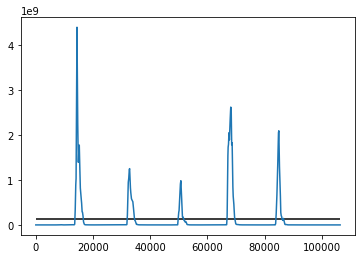

In [8]:
threshold=0.03
plt.plot(np.arange(0, 106400), interpolated_power)
plt.hlines(np.max(interpolated_power)*threshold, 0, 106400)

In [9]:
voice_ranges = np.where(interpolated_power > np.max(interpolated_power)*threshold, 1 ,0)

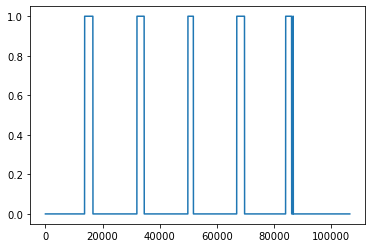

In [10]:
plt.plot(np.arange(0, 106400), voice_ranges)

In [11]:
from scipy.signal import convolve

In [ ]:
def delta(signal, convolution_array=(-1, 0, 1)):
    """
    Calculate the variation of a signal using

```latex
d(t) = \fraq={c(t+1)-c(t-1)}{2}
```
    :param signal:
    :return:
    """
    return convolve(signal, np.array(convolution_array), 'same', 'direct') / len(convolution_array)

In [ ]:
deltas = delta(voice_ranges, (1,-1))

In [ ]:
changes_to_positive = np.where(deltas > 0)
changes_to_positive

In [ ]:
changes_to_negative = np.where(deltas < 0)
changes_to_negative

In [ ]:
changes_to_positive[0].shape

In [ ]:
changes_to_negative[0].shape

In [ ]:
intervals = list(zip(changes_to_positive[0], changes_to_negative[0]))

In [ ]:
intervals

In [ ]:
plt.plot(np.arange(0, 106400), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')

In [ ]:
np.argwhere(voice_ranges > 0)